In [1]:
import tensorflow as tf
import tensorflow.contrib as tcb
from tensorflow.contrib.learn.python.learn.learn_io.numpy_io import numpy_input_fn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
    

In [2]:
def model_fn(features, labels, mode, params):
    # get features

    X = features["X"]
    Y = features["Y"]
    
    inputs = tf.concat([X, Y], axis = 1) # b * 2
    print(X.shape, Y.shape, labels.shape, inputs.shape)

    p = params.get("p", 1)
    xavier = tcb.layers.xavier_initializer(seed=42)
    W = tf.get_variable("W", shape=(2, p), dtype = tf.float64) # 2 * p
    b = tf.get_variable("b", shape=(1, p), dtype = tf.float64) # 1 * p but will get broadcasted to batch size by tf => b * p
    
    initializer = tcb.layers.xavier_initializer(seed=42)
    out1 = tf.matmul(inputs, W) + b # b * p
    out2 = tf.nn.relu(out1) # b * p
    #predictions = tcb.layers.fully_connected(out2, num_outputs=1, activation_fn=None, weights_initializer=None)
    w_outer = tf.get_variable("w_outer", shape=[p, 1], dtype=tf.float64) # p x 1
    b_outer = tf.get_variable("b_outer", shape=[1, 1], dtype=tf.float64) # 1 x 1

    predictions = tf.nn.sigmoid(tf.matmul(out2, w_outer)  + b_outer)# b x 1
    # prediction part

    if mode == tcb.learn.ModeKeys.INFER:
        return tcb.learn.ModelFnOps(
            mode= mode,
            predictions = predictions,
            loss = None,
            train_op = None
        )

    # training part => fit

    loss = tf.losses.mean_squared_error(labels, predictions)
    learning_rate = params.get("learning_rate", 1e-5)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    tf.Print(loss, [inputs, labels])
    
    global_step = tf.contrib.framework.get_global_step()
    train_op = tf.group(optimizer, tf.assign_add(global_step, 1))

#     train_op = tcb.layers.optimize_loss(loss=loss,
#                                         global_step = tf.contrib.framework.get_global_step(),
#                                         learning_rate=learning_rate,
#                                         optimizer = "SGD")

    return tcb.learn.ModelFnOps(
        mode = mode,
        predictions = predictions,
        loss = loss,
        train_op = train_op
    )


In [3]:
import numpy as np
# X = np.array(range(1, 51) ,dtype=np.float64).reshape(-1, 1) *  1.0
# Y = np.array(range(0, 100, 2), dtype=np.float64).reshape(-1, 1) * 1.0
# X1, Y1 = np.meshgrid(X, Y)
# X = X1.reshape(-1, 1)
# Y = Y1.reshape(-1, 1)
# Z = X + Y
# print(X.shape, Y.shape, Z.shape)

X = np.linspace(-5,5)
Y = np.linspace(-5,5)
X, Y = np.meshgrid(X, Y)

Z = 10+100*np.exp(-1*(X**2 + Y**2)/5)

X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
Z = Z.reshape(-1,1)

In [4]:
input_fn = numpy_input_fn(x= {"X": X, "Y": Y}, y = Z, batch_size=100, num_epochs=1000, shuffle=True)

In [5]:
estimator = tcb.learn.Estimator(model_fn=model_fn, params={"learning_rate": 1e-5, "p": 100})

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f1535e63ba8>, '_master': '', '_num_ps_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000}


In [6]:
y = estimator.fit(input_fn=input_fn)

(?, 1) (?, 1) (?, 1) (?, 2)
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpqz7qy7jz/model.ckpt.
INFO:tensorflow:loss = 1213.41, step = 1
INFO:tensorflow:global_step/sec: 370.404
INFO:tensorflow:loss = 1248.04, step = 101
INFO:tensorflow:global_step/sec: 369.693
INFO:tensorflow:loss = 980.363, step = 201
INFO:tensorflow:global_step/sec: 384.988
INFO:tensorflow:loss = 1651.44, step = 301
INFO:tensorflow:global_step/sec: 404.773
INFO:tensorflow:loss = 1489.39, step = 401
INFO:tensorflow:global_step/sec: 377.521
INFO:tensorflow:loss = 1097.6, step = 501
INFO:tensorflow:global_step/sec: 359.277
INFO:tensorflow:loss = 1354.91, step = 601
INFO:tensorflow:global_step/sec: 372.315
INFO:tensorflow:loss = 1791.7, step = 701
INFO:tensorflow:global_step/sec: 364.346
INFO:tensorflow:loss = 1495.68, step = 801
INFO:tensorflow:global_step/sec: 386.167
INFO:tensorflow:loss = 1554.39, step = 901
INFO:tensorflow:global_step/sec: 413.201
INFO:tensorflow:l

INFO:tensorflow:loss = 1263.62, step = 9501
INFO:tensorflow:global_step/sec: 371.338
INFO:tensorflow:loss = 1490.01, step = 9601
INFO:tensorflow:global_step/sec: 357.039
INFO:tensorflow:loss = 1172.1, step = 9701
INFO:tensorflow:global_step/sec: 370.414
INFO:tensorflow:loss = 1325.32, step = 9801
INFO:tensorflow:global_step/sec: 378.498
INFO:tensorflow:loss = 1080.97, step = 9901
INFO:tensorflow:global_step/sec: 365.882
INFO:tensorflow:loss = 1015.36, step = 10001
INFO:tensorflow:global_step/sec: 391.873
INFO:tensorflow:loss = 1503.99, step = 10101
INFO:tensorflow:global_step/sec: 394.743
INFO:tensorflow:loss = 1050.36, step = 10201
INFO:tensorflow:global_step/sec: 407.555
INFO:tensorflow:loss = 1140.38, step = 10301
INFO:tensorflow:global_step/sec: 376.423
INFO:tensorflow:loss = 1722.04, step = 10401
INFO:tensorflow:global_step/sec: 368.252
INFO:tensorflow:loss = 895.186, step = 10501
INFO:tensorflow:global_step/sec: 363.453
INFO:tensorflow:loss = 1444.92, step = 10601
INFO:tensorflow

INFO:tensorflow:global_step/sec: 350.948
INFO:tensorflow:loss = 1821.45, step = 19101
INFO:tensorflow:global_step/sec: 364.401
INFO:tensorflow:loss = 1474.64, step = 19201
INFO:tensorflow:global_step/sec: 373.629
INFO:tensorflow:loss = 1628.33, step = 19301
INFO:tensorflow:global_step/sec: 358.922
INFO:tensorflow:loss = 1243.22, step = 19401
INFO:tensorflow:global_step/sec: 350.587
INFO:tensorflow:loss = 1598.0, step = 19501
INFO:tensorflow:global_step/sec: 375.858
INFO:tensorflow:loss = 1275.64, step = 19601
INFO:tensorflow:global_step/sec: 348.493
INFO:tensorflow:loss = 1694.03, step = 19701
INFO:tensorflow:global_step/sec: 342.989
INFO:tensorflow:loss = 1516.11, step = 19801
INFO:tensorflow:global_step/sec: 340.754
INFO:tensorflow:loss = 1130.86, step = 19901
INFO:tensorflow:global_step/sec: 353.583
INFO:tensorflow:loss = 1438.01, step = 20001
INFO:tensorflow:global_step/sec: 348.008
INFO:tensorflow:loss = 1116.8, step = 20101
INFO:tensorflow:global_step/sec: 367.608
INFO:tensorflow

In [7]:
predict_input_fn = numpy_input_fn(x= {"X": X, "Y": Y}, y = Z, batch_size=5, num_epochs=1, shuffle=False)
Zgo = estimator.predict(input_fn=predict_input_fn)
Zout = np.array([x[0] for x in Zgo]).reshape(-1,1)

(?, 1) (?, 1) (?, 1) (?, 2)


In [8]:

def plot3d(x, y, z):
    l = int(np.sqrt(x.shape[0]))
    x1 = x.reshape(l,l)
    y1 = y.reshape(l,l)
    z1 = z.reshape(l,l)
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    surf = ax.plot_surface(x1, y1, z1, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    plt.show()

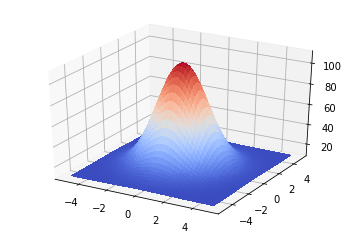

In [9]:
plot3d(X,Y,Z)

In [10]:
Zout

array([[ 0.99988084],
       [ 0.99986247],
       [ 0.99984144],
       ..., 
       [ 0.9998419 ],
       [ 0.99986572],
       [ 0.99988671]])

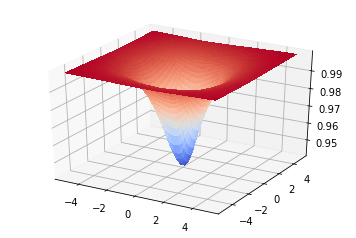

In [11]:
plot3d(X,Y, Zout)

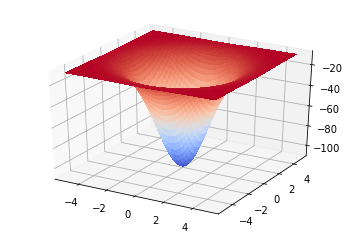

In [12]:
Zout = Zout.reshape(-1, 1)
plot3d(X, Y, Zout-Z)      

In [13]:
estimator.evaluate(input_fn=predict_input_fn)

(?, 1) (?, 1) (?, 1) (?, 2)
INFO:tensorflow:Starting evaluation at 2018-01-25-11:10:06
INFO:tensorflow:Finished evaluation at 2018-01-25-11:10:06
INFO:tensorflow:Saving dict for global step 25001: global_step = 25001, loss = 1104.77


{'global_step': 25001, 'loss': 1104.7747}